<a href="https://colab.research.google.com/github/marianamelodev/telecom-x-part-1/blob/main/Telecom_X_Parte_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X – Análise de Evasão de Clientes

## 1. Introdução
## 2. Importando bibliotecas
## 3. Extraindo dados da API
## 4. Criando o DataFrame
## 5. Explorando a estrutura do dataset
## 6. Análise Descritiva
## 7. Churn: Distribuição Geral
## 8. Churn x Variáveis Categóricas
## 9. Churn x Variáveis Numéricas
## 10. Conclusões e Recomendações

**1. Introdução**

# Telecom X – Análise de Evasão de Clientes

A empresa enfrenta um alto índice de cancelamento de clientes. Nosso objetivo é identificar padrões e variáveis que ajudam a prever quais clientes tendem a cancelar o serviço.

Vamos importar os dados, limpar, analisar e gerar insights para orientar futuras ações estratégicas.


**2. Importando Bibliotecas**

In [54]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set(style="whitegrid")


**3. Extraindo dados da API**

In [55]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

response = requests.get(url)
dados = response.json()


dados[:2]  # mostra os dois primeiros registros

[{'customerID': '0002-ORFBO',
  'Churn': 'No',
  'customer': {'gender': 'Female',
   'SeniorCitizen': 0,
   'Partner': 'Yes',
   'Dependents': 'Yes',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'Yes',
   'DeviceProtection': 'No',
   'TechSupport': 'Yes',
   'StreamingTV': 'Yes',
   'StreamingMovies': 'No'},
  'account': {'Contract': 'One year',
   'PaperlessBilling': 'Yes',
   'PaymentMethod': 'Mailed check',
   'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},
 {'customerID': '0003-MKNFE',
  'Churn': 'No',
  'customer': {'gender': 'Male',
   'SeniorCitizen': 0,
   'Partner': 'No',
   'Dependents': 'No',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'No',
   'DeviceProtection': 'No',
   'TechSupport': 'No',
   'StreamingTV': 'No',
   'StreamingMovies': 

**4. Criando o DataFrame**

In [78]:
df = pd.DataFrame(dados)

df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**5. Explorando a estrutura do dataset**

In [57]:

df.info()

df.describe()

df.columns.tolist()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

**6. Limpeza dos dados**

In [58]:
df.isnull().sum()

# df.duplicated().sum() # Removed: Causes TypeError due to unhashable dicts
# df.drop_duplicates(inplace=True) # Removed: Causes TypeError due to unhashable dicts

# df['TipoContrato'] = df['TipoContrato'].str.lower().str.strip() # Removed: Column 'TipoContrato' does not exist

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


**7. Criando a coluna contas_diarias e análise descritiva**

In [77]:
df.info()

display(df.describe())

# Exclude columns with nested dictionaries from unique value check
cols_to_exclude = ['customer', 'phone', 'internet', 'account']
for col in df.select_dtypes(include='object').columns:
    if col not in cols_to_exclude:
        print(f"Unique values in '{col}': {df[col].unique()[:10]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


Unique values in 'customerID': ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Unique values in 'Churn': ['No' 'Yes' '']


**8. Churn Distribuition**

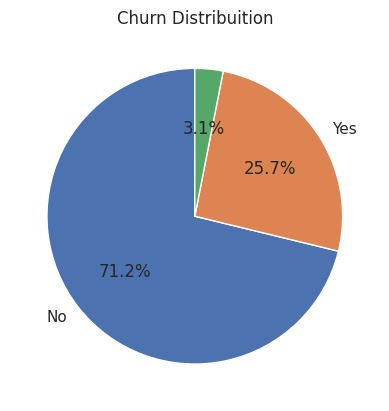

In [69]:
# Ver contagem absoluta
df['Churn'].value_counts()

# Gráfico de pizza
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribuition')
plt.ylabel('')
plt.show()


**9. Churn por variáveis categóricas**

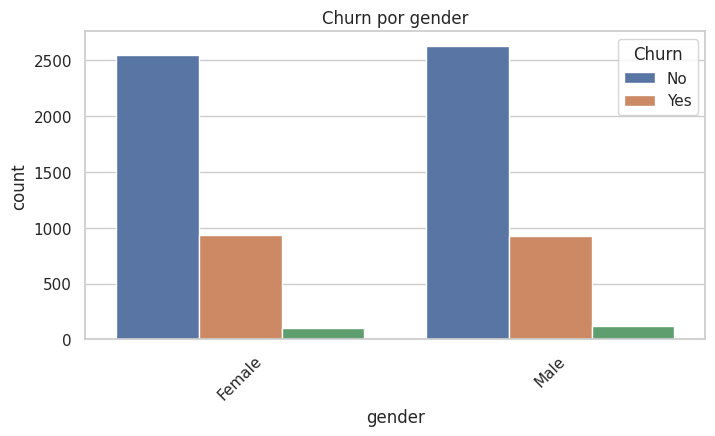

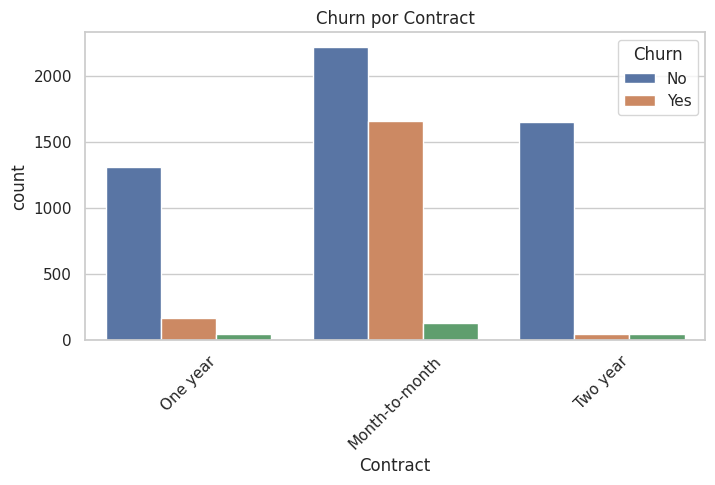

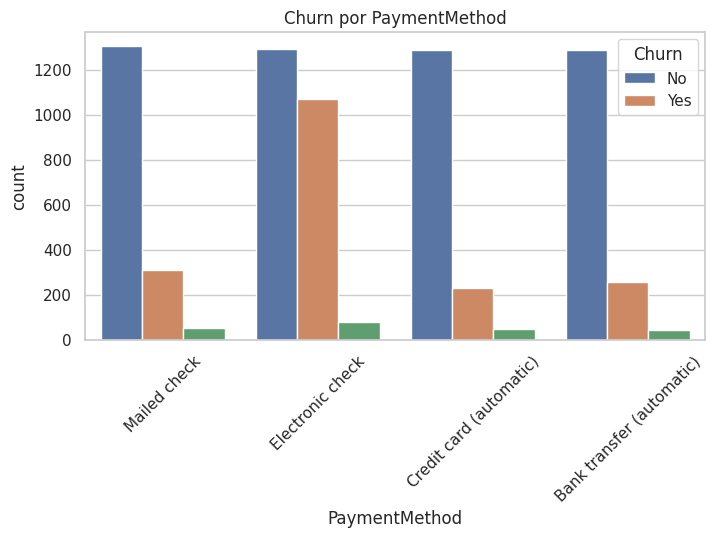

In [86]:
cat_cols = ['gender', 'Contract', 'PaymentMethod']  # Corrected column names

for col in cat_cols:
    if col in df.columns: # Check if column exists
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, hue='Churn')
        plt.title(f'Churn por {col}')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.") # Print message if column is missing

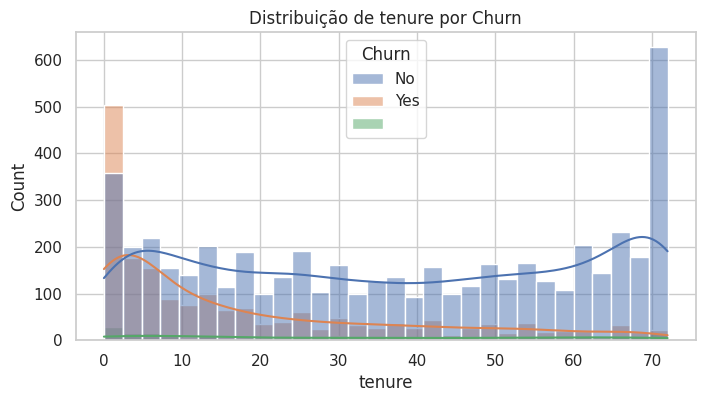

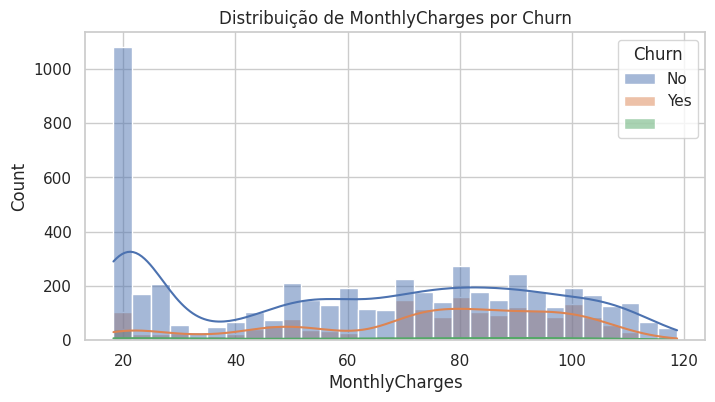

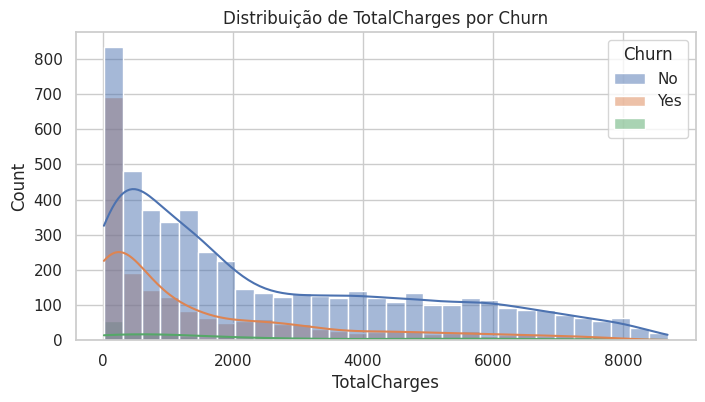

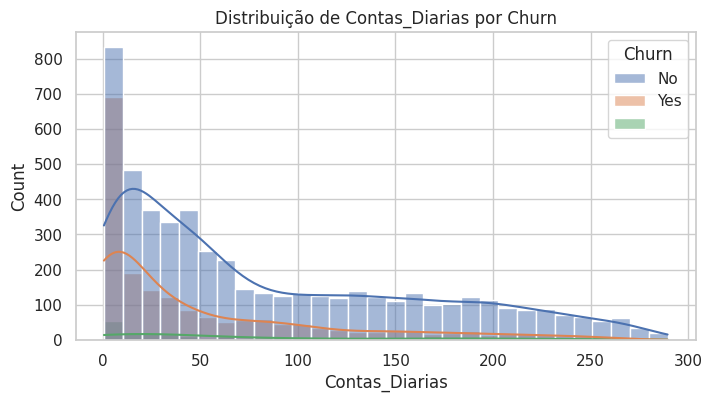

In [87]:
# Code from cell SlqRow-QApbn
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contas_Diarias']  # Corrected numerical column names

for col in num_cols:
    if col in df.columns: # Check if column exists
        plt.figure(figsize=(8,4))
        sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30)
        plt.title(f'Distribuição de {col} por Churn')
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.") # Print message if column is missing

## Conclusões e Recomendações

- Clientes com contrato mensal têm maior taxa de evasão.
- Métodos de pagamento automáticos estão associados a menor churn.
- Clientes com menor tempo de contrato e menor gasto tendem a sair mais.

### Recomendações:
- Incentivar contratos anuais.
- Oferecer bônus para fidelidade após 3 meses.
- Acompanhar de perto clientes com baixo gasto.

### Edições:
- Algumas palavras foram modificadas para o Inglês.